<a href="https://colab.research.google.com/github/Modnarudom/modProject/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Churn model


In [26]:
import numpy as np
import seaborn as sns
import plotly.express as py
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

###import data

In [7]:
!unzip /content/data_1.zip

Archive:  /content/data_1.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [8]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [9]:
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 7043 Columns 21


In [10]:
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [11]:
data.describe(include= "O").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


###clean data

In [12]:
data.drop("customerID", axis =1 , inplace = True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
def check_missing_values(data):
  missing_value = data.isnull().sum().sort_values(ascending = False)
  percent_missing = (data.isnull().sum()/data.shape[0]).sort_values(ascending = False)
  missing = pd.concat([missing_value, percent_missing], axis = 1, keys =['missing_value', 'percent_missing'])
  return missing
check_missing_values(data)

,missing_value,percent_missing
gender,0,0.0
SeniorCitizen,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [28]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['missing'] = df.isnull().sum().values
    summ['missing_percentage'] = (df.isnull().sum().values / len(df)) * 100
    summ['unique'] = df.nunique().values
    desc = df.describe(include='all').transpose()
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    return summ

In [29]:
summary(data)

data shape: (7043, 20)


,data type,missing,missing_percentage,unique,min,max,average,standard_deviation
gender,object,0,0.000000,2,NaN,NaN,NaN,NaN
SeniorCitizen,int64,0,0.000000,2,0.0,1.0,0.162147,0.368612
Partner,object,0,0.000000,2,NaN,NaN,NaN,NaN
Dependents,object,0,0.000000,2,NaN,NaN,NaN,NaN
tenure,int64,0,0.000000,73,0.0,72.0,32.371149,24.559481
PhoneService,object,0,0.000000,2,NaN,NaN,NaN,NaN
MultipleLines,object,0,0.000000,3,NaN,NaN,NaN,NaN
InternetService,object,0,0.000000,3,NaN,NaN,NaN,NaN
OnlineSecurity,object,0,0.000000,3,NaN,NaN,NaN,NaN
OnlineBackup,object,0,0.000000,3,NaN,NaN,NaN,NaN


In [30]:
data.dropna(inplace =True)

In [15]:
data["TotalCharges"] = data["TotalCharges"].str.replace(" ", "").replace("", np.nan).astype(float)
data.describe(include = 'O').T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [16]:
check_missing_values(data)

,missing_value,percent_missing
TotalCharges,11,0.001562
gender,0,0.000000
SeniorCitizen,0,0.000000
MonthlyCharges,0,0.000000
PaymentMethod,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000
StreamingMovies,0,0.000000
StreamingTV,0,0.000000
TechSupport,0,0.000000


In [17]:
columns = data.columns
numeric = {}
category = {}
for col in columns:
  if data[col].dtypes != object:
    numeric[col] = len(data[col].unique())
  else:
    category[col] = len(data[col].unique())




In [18]:
print(f"--------------numeric feild----------------")
for key,value in numeric.items():
  print(f"unique number of {key} = {value}\n")

print(f"--------------category feild----------------")
for key,value in category.items():
  print(f"unique number of {key} = {value} \n")


--------------numeric feild----------------
unique number of SeniorCitizen = 2

unique number of tenure = 73

unique number of MonthlyCharges = 1585

unique number of TotalCharges = 6531

--------------category feild----------------
unique number of gender = 2 

unique number of Partner = 2 

unique number of Dependents = 2 

unique number of PhoneService = 2 

unique number of MultipleLines = 3 

unique number of InternetService = 3 

unique number of OnlineSecurity = 3 

unique number of OnlineBackup = 3 

unique number of DeviceProtection = 3 

unique number of TechSupport = 3 

unique number of StreamingTV = 3 

unique number of StreamingMovies = 3 

unique number of Contract = 3 

unique number of PaperlessBilling = 2 

unique number of PaymentMethod = 4 

unique number of Churn = 2 



<Axes: >

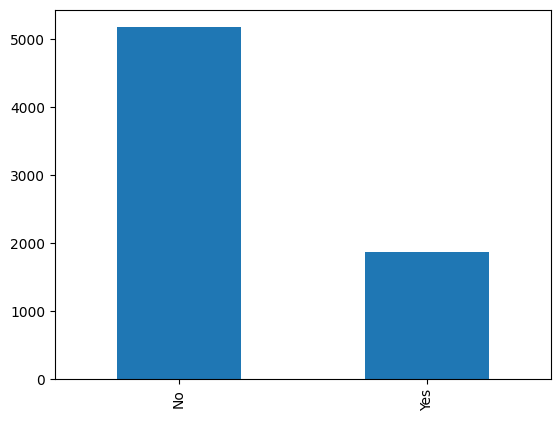

In [23]:
data['Churn'].value_counts().plot(kind = 'bar')

#model

In [22]:
#creating nummerical and categorical
categorical = []
numerical = []
for i in data.columns:
  if data[i].dtypes != object:
    numerical.append(i)
  else:
    categorical.append(i)
categorical = categorical
print(f'numerical {numerical}')
print(f'categorical {categorical}')

numerical ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [32]:
# Label Encoding refers to converting the labels into a numeric form.
label = LabelEncoder()
df1 = data.copy()
df1[categorical] = df1[categorical].apply(label.fit_transform)
y = df1[['Churn']].apply(label.fit_transform)

df1.drop(columns=['Churn'], axis =1 ,inplace = True)

In [33]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)
# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Create and train a logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_resampled, y_resampled)

In [34]:
# Create and train a logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [35]:
log_reg = sm.Logit(y_resampled, X_resampled).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.432309
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 8260
Model:                          Logit   Df Residuals:                     8241
Method:                           MLE   Df Model:                           18
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                  0.3763
Time:                        22:07:58   Log-Likelihood:                -3570.9
converged:                       True   LL-Null:                       -5725.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
gender              -0.3632      0.059     -6.166      0.000      -0.479      -0.248
SeniorCitiz

In [36]:
# colinearlity checking
vif_data = pd.DataFrame()
vif_data["feature"] = X_resampled.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_resampled.values, i)
                          for i in range(len(X_resampled.columns))]
print(vif_data)

             feature        VIF
0             gender   1.758761
1      SeniorCitizen   1.260508
2            Partner   2.472970
3         Dependents   1.827980
4             tenure  14.633751
5       PhoneService  15.033232
6      MultipleLines   2.705863
7    InternetService   4.286138
8     OnlineSecurity   2.095534
9       OnlineBackup   2.279277
10  DeviceProtection   2.408196
11       TechSupport   2.219353
12       StreamingTV   3.061411
13   StreamingMovies   3.114941
14          Contract   3.600741
15  PaperlessBilling   2.697334
16     PaymentMethod   3.318066
17    MonthlyCharges  18.466070
18      TotalCharges  13.412881


In [38]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using appropriate metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[782 251]
 [113 261]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      1033
           1       0.51      0.70      0.59       374

    accuracy                           0.74      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.74      0.75      1407

Accuracy Score: 0.7412935323383084


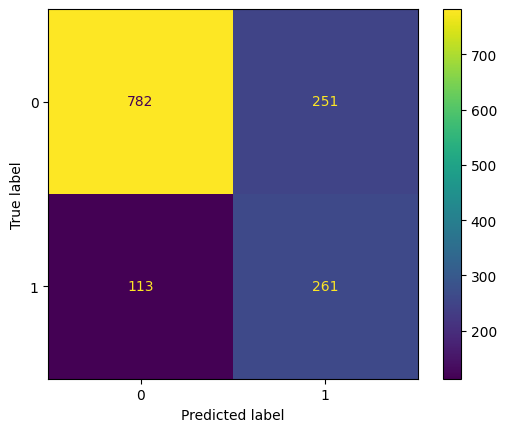

In [39]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
plt.show()
disp.plot()

<Axes: ylabel='Feature'>

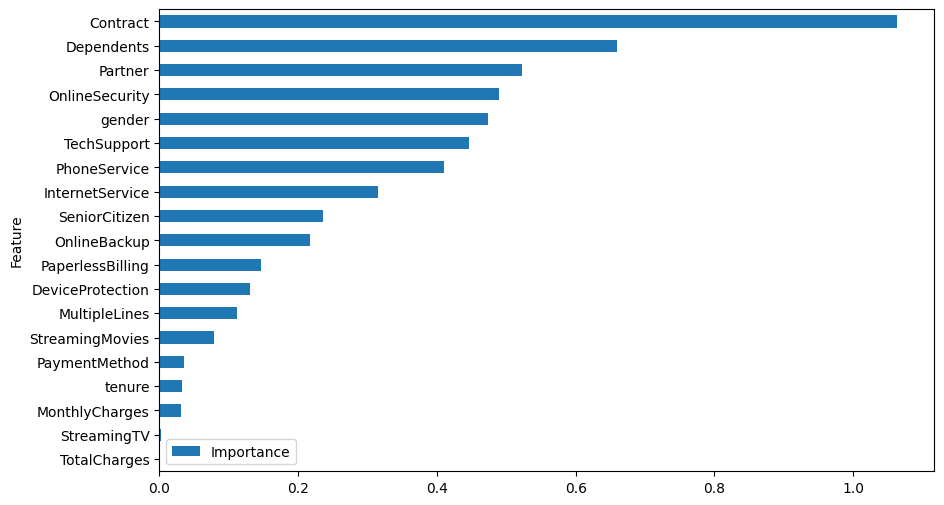

In [40]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

##manage colinearity

In [41]:
high_vif_columns = vif_data[vif_data['VIF'] > 10]['feature']

# Drop the columns with high VIF from the training set (X_train)
X_train = X_train.drop(columns=high_vif_columns)

# Drop the same columns from the test set (X_test)
X_test = X_test.drop(columns=high_vif_columns)

# Print the columns that were dropped
print(f"Dropped columns with high VIF: {list(high_vif_columns)}")
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Dropped columns with high VIF: ['tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges']


In [42]:
# Create and train a logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [44]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using appropriate metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[683 350]
 [ 83 291]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76      1033
           1       0.45      0.78      0.57       374

    accuracy                           0.69      1407
   macro avg       0.67      0.72      0.67      1407
weighted avg       0.78      0.69      0.71      1407

Accuracy Score: 0.6922530206112296


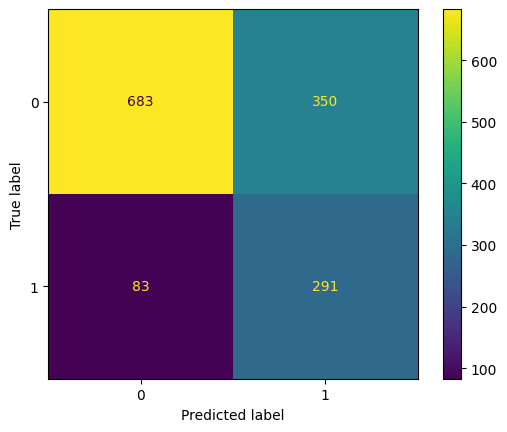

In [45]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
plt.show()
disp.plot()

<Axes: ylabel='Feature'>

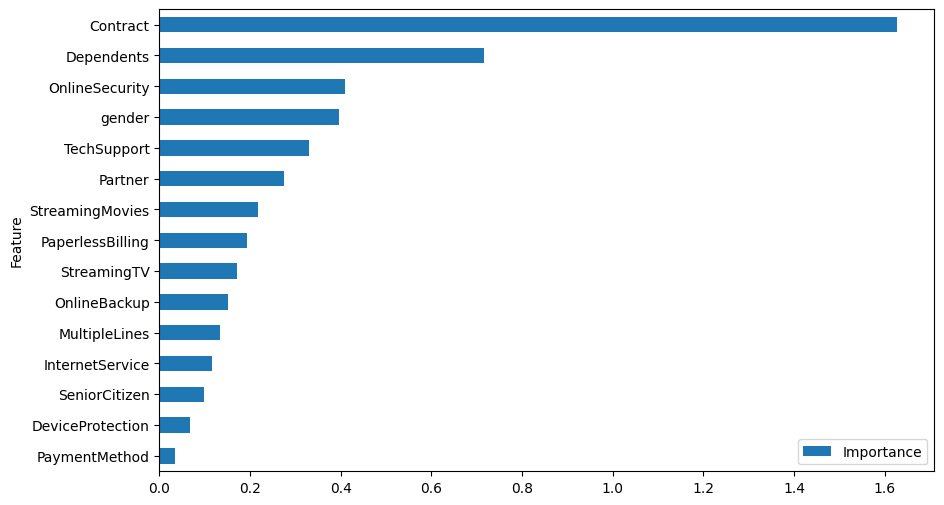

In [46]:
coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_resampled.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))